# Machine Learning Mandatory Assignment 2
## Question 2 PCA application on image reconstruction 


In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from skimage import transform, io

In [2]:
#load the dataset 
dataset = fetch_olivetti_faces()
faces = dataset.data
target = dataset.target

In [3]:
#question 2.1.1: apply PCA model on the dataset and preserve 99% of variance 
def pca_reconstructured(data, n_components):
    """
    This function allow people to apply pca model on the dataset and do the reconstruction
    data(object): the dataset users want to apply pca model on.
    n_components(int): the percentage of variance that the user want to preserve.
    """
    pca = PCA(n_components, svd_solver='full')
    pca.fit(data)
    trans = pca.transform(data)
    reconstructed = pca.inverse_transform(trans)
    return reconstructed

In [4]:
reconstructed=pca_reconstructured(faces,0.99)

In [5]:
#question 2.1.2: calculate the reconstruction error of the model 
def re_err(data,re_data):
    """
    This function use the sum of square difference between the original data and the reconstructured data
    data(object): the original data 
    re_data(object):the reconstructed data
    """
    reconstruction_errors = np.sum(np.square(faces - reconstructed), axis=1)
    return  reconstruction_errors

In [6]:
reconstruction_errors_or=re_err(faces, reconstructed )
print(reconstruction_errors_or)

[1.0685257  0.68035996 0.67168486 1.1304203  0.43947586 0.38783133
 0.8712586  1.1481508  0.470665   0.24267581 0.3949275  0.4019584
 0.19419953 0.33274665 0.20216349 1.0056796  0.44699493 0.8613148
 0.7801426  0.71679115 1.1736524  0.83220655 0.93058735 1.0119075
 0.7305844  0.48350567 0.72454363 0.6709064  1.0751071  1.0778081
 0.28479525 0.2730174  0.12942114 1.1548853  1.0566138  0.5373822
 1.2730231  0.21388611 0.23216847 0.6453977  0.9998461  1.2192957
 1.1190193  0.9531505  1.1538672  1.1753218  1.0776671  0.679695
 0.9528226  1.0268209  1.4164462  1.3501242  1.1745355  1.0935688
 0.91589403 1.3063817  1.0272166  0.7417935  0.6632255  1.3080521
 0.65766805 0.15227696 0.57800287 0.14546463 0.21733546 0.4868967
 0.20654404 0.7485477  0.3479697  0.07293858 0.84132314 1.083658
 0.51186585 0.8984386  1.1423631  0.8703661  0.6715889  0.939883
 0.29394755 0.5453005  0.94277644 1.1239759  1.0553492  1.2154442
 1.0069273  1.0771152  0.8926369  1.1457117  1.1710571  0.9117562
 1.0214181  

In [7]:
#question 2.2.1: add some noise on the original data 
indices = [0, 10, 20, 30, 40, 50]
noisy_images = []
for i in indices:
    image = faces[i].reshape((64, 64))
    #using the different way to add noise 
    if i%3==0:
        #rotate the image
        image = transform.rotate(image, angle=69, mode='reflect') 
        
    if i%3==1:
        #flip the image 
        image = np.fliplr(image) 
    if i%3==2:
        #darken teh image
        image = np.where(image > 0.3, image, image*5) 
    noisy_images.append(image)
#transform the list into numpy array 
noisy_images = np.array(noisy_images)
noisy_images = noisy_images.reshape((len(indices), -1))


In [8]:
#qustion 2.2.2: apply the pca model and compute the reconstruction error 
noisy_reconstructed=pca_reconstructured(noisy_images,0.99)
noisy_errors=re_err(faces[indices],noisy_reconstructed)

In [9]:
#question 3:# display the original images, images after PCA, and images after PCA+noise side-by-side
def plot_pca(original_image, reconstructed_image, noisy_image,indices,reconstruction_error_or, noisy_error):
    """
    This function allow user to visualize the image processed by pca model.
    original_image(object): The image hasn't been compressed by pca model.
    reconstructed_image(object): The image that has been compressed by pca model.
    noisy_image(object):The image that has be added the noise.
    indicies (list/object): The list of the index of image that has been added the noise.
    reconstruction_error_or(object):The reconstruction error of the original reconstructed image
    noisy_error(object):The reconstruction error of the noist image
    """
    
    for i in range(len(indices)):
        original_image = original_image[indices[i]].reshape((64, 64))
        reconstructed_image = reconstructed_image[indices[i]].reshape((64, 64))
        noisy_image = noisy_image[i].reshape((64, 64))

        io.imshow_collection([original_image, reconstructed_image, noisy_image])
        print(f"Reconstruction error for original image {indices[i]}: {reconstruction_errors_or[indices[i]]}")
        print(f"Reconstruction error for noisy image {indices[i]}: {noisy_errors[i]}")


Reconstruction error for original image 0: 1.0685256719589233
Reconstruction error for noisy image 0: 1.0685256719589233
Reconstruction error for original image 10: 0.3949275016784668
Reconstruction error for noisy image 10: 0.680359959602356
Reconstruction error for original image 20: 1.1736524105072021
Reconstruction error for noisy image 20: 0.6716848611831665
Reconstruction error for original image 30: 0.28479525446891785
Reconstruction error for noisy image 30: 1.1304203271865845
Reconstruction error for original image 40: 0.9998461008071899
Reconstruction error for noisy image 40: 0.4394758641719818
Reconstruction error for original image 50: 1.4164462089538574
Reconstruction error for noisy image 50: 0.38783133029937744


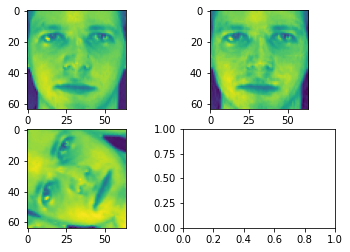

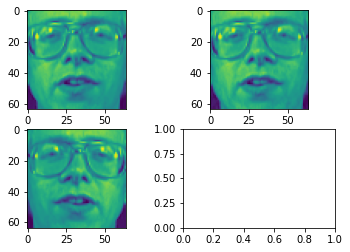

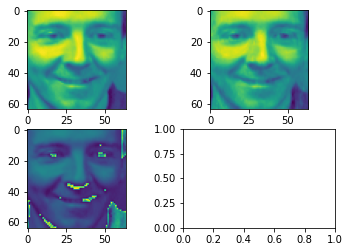

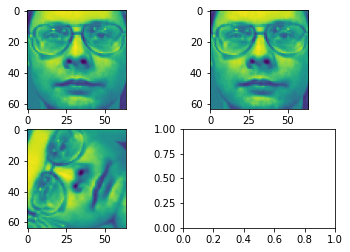

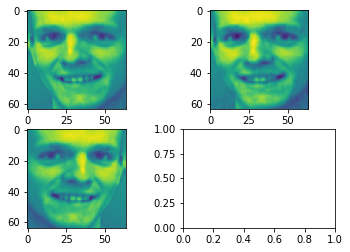

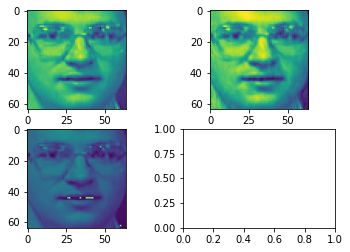

In [12]:
    for i in range(len(indices)):
        original_image = faces[indices[i]].reshape((64, 64))
        reconstructed_image = reconstructed[indices[i]].reshape((64, 64))
        noisy_image = noisy_reconstructed[i].reshape((64, 64))

        io.imshow_collection([original_image, reconstructed_image, noisy_image])
        print(f"Reconstruction error for original image {indices[i]}: {reconstruction_errors_or[indices[i]]}")
        print(f"Reconstruction error for noisy image {indices[i]}: {noisy_errors[i]}")